
## Vector Data Types 

A vector is a discrete geometric entity that represents or approximates a distinct “thing” on a surface. This surface is usually land but could be the bottom of the sea or a different planet. 

The three basic types for vector data are points, lines and polygons. 

### Points as XY Coordinates

Vector points are XY coordinates. Generally, they are a latitude and longitude with a spatial reference frame.

When features are too small to be represented as polygons, points are used. For example, you can’t see city boundary lines at a global scale. In this case, maps often use points to display cities.

### Lines Connect Vertices

Vector lines connect each vertex with paths. Basically, connect the dots in a set order and it becomes a vector line with each dot representing a vertex.

Lines usually represent features that are linear in nature. For example, maps show rivers, roads and pipelines as vector lines. Lines on maps often provide further details about represented objects through styling, such as a busier highway having thicker lines than an abandoned road.

On the other hand, networks are line data sets but they are often considered to be different. This is because linear networks are topologically connected elements. They consist of junctions and turns with connectivity.

If you were to find an optimal route using a traffic line network, it would follow set rules. For example, it can restrict turns and movement on one-way streets.

### Polygons Connect Vertices and Close Them

When you join a set of vertices in a particular order and close it, this is a vector polygon feature. In order to create a polygon, the first and last coordinate pair are the same.

Polygons are used to show boundaries and have an area. For example, a building footprint has a square footage and agricultural fields have acreage.

## GeoSeries
A GeoSeries is essentially a vector where each entry in the vector is a set of shapes corresponding to one observation. An entry may consist of only one shape (like a single polygon) or multiple shapes that are meant to be thought of as one observation (like the many polygons that make up the State of Hawaii or a country like Indonesia). -- From: [Geopanda Documentation](http://geopandas.org/data_structures.html)

In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame

First, lets define a simple dictionary of lists.

In [2]:
data = {'name': ['a', 'b', 'c'],
        'lat': [34, 30, 32],
        'lon': [-118, -120, -123]}

Now lets create a list of Point shapely objects out of X & Y coordinate lists

In [3]:
geometry = [Point(xy) for xy in zip(data['lon'], data['lat'])]

Now lets create a GeoSeries where we explicitly define the index values.

In [4]:
series = GeoSeries(geometry, index=data['name'])
series

a    POINT (-118 34)
b    POINT (-120 30)
c    POINT (-123 32)
dtype: object

Additionally, a GeoSeries (and a GeoDataFrame) can store a CRS implicitly associated with the geometry column. This is useful as essential spatial metadata and for transformation (reprojection) to another CRS. 
Let’s assign the CRS to Web Mercator

In [5]:
series.crs = {'init': 'epsg:3857'}

Now lets plot the points

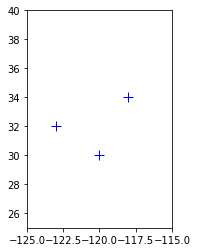

In [6]:
series.plot(marker='+', color='blue', markersize=10, figsize=(4, 4))
plt.ylim([25, 40])
plt.xlim([-125, -115]);

##  GeoDataFrames

A GeoDataFrame is a tabular data structure that contains a GeoSeries.

The most important property of a GeoDataFrame is that it always has one GeoSeries column that holds a special status. This GeoSeries is referred to as the GeoDataFrame’s “geometry”. When a spatial method is applied to a GeoDataFrame (or a spatial attribute like area is called), this command will always act on the “geometry” column.

The “geometry” column – no matter its name – can be accessed through the geometry attribute (gdf.geometry), and the name of the geometry column can be found by typing gdf.geometry.name.

A GeoDataFrame may also contain other columns with geometrical (shapely) objects, but only one column can be the active geometry at a time. To change which column is the active geometry column, use the set_geometry method. -- From [GeoPanda Documentation](http://geopandas.org/data_structures.html)

Lets look at creating a GeoDataFrame instead of a simple GeoSeries

We will start with reusing our data directory but this time creating a dataframe with it.

In [7]:
df = pd.DataFrame(data)
df

,lat,lon,name
0,34,-118,a
1,30,-120,b
2,32,-123,c


Now we use the DataFrame and the “list-of-shapely-Point-objects” approach to create a GeoDataFrame. Note the use of two DataFrame attribute columns, which are effectively just two simple Pandas Series.

In [8]:
geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)

There’s nothing new to visualize, but this time we’re using the plot method from a GeoDataFrame, not from a GeoSeries. They’re not exactly the same thing under the hood.

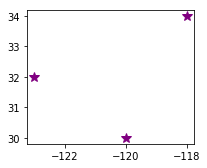

In [9]:
gdf.plot(marker='*', color='purple', markersize=10, figsize=(3, 3));

# Save Your Notebook
## Then Notebook Menu:  File > Close and Halt